This notebook contains the code and other related sources to final work(This is renewed version of main.ipynb machine learning notebook which is created according to teacher's suggestions.)

Author : Umidjon Sattorov. student at Skillbox platform

Timur Islamgulov's suggestions : 

1)

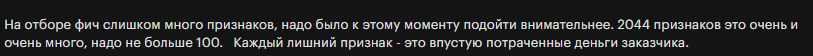

2) 

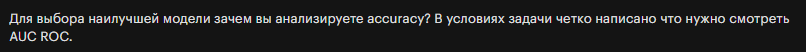 

3) 



4) 

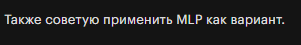 

5) 

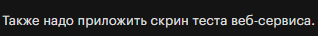

The code cell below is for installing hashencoder

In [1]:
!pip install category_encoders

In [1]:
#Importing essential modules and packages
import pandas as pd 
import numpy as np 

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt 

#Model metrics
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neural_network import MLPClassifier
from category_encoders import HashingEncoder

#Model saving 
import pickle as pkl 

In [2]:
#Dataset for training and testing(Data uploading)
df = pd.read_csv(filepath_or_buffer = "./data/cleaned_data.csv")
df.head(10)

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_label,visit_date,visit_time,...,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_screen_resolution,device_browser,geo_country,geo_city,target_action
0,4024492994895054107.1640269084.1640269084,12,105,event,FwdMTcXzWAwhtsnMAbhS,podpiska.sberauto.com/,sub_button_click,VppGBKuEPJVLSsOLERbm,2021-12-23,17:18:04,...,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,1536x864,Chrome,Russia,Ulyanovsk,0
1,4024492994895054107.1640269084.1640269084,12,98,event,FwdMTcXzWAwhtsnMAbhS,podpiska.sberauto.com/,sub_button_click,OHfyUfDKdPgBdvelDlfG,2021-12-23,17:18:04,...,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,1536x864,Chrome,Russia,Ulyanovsk,0
2,555009234841130092.1640256620.1640256620,12,104,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars?yzclid=6771251748358633377&r...,chat,uDrwlhtkwJJbRcbyRaTW,2021-12-23,13:50:20,...,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,desktop,Windows,1920x1080,Chrome,Russia,Saint Petersburg,0
3,555009234841130092.1640256620.1640256620,12,10,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars?yzclid=6771251748358633377&r...,listing_ads,hAHqGICPFQiPwtzubOzs,2021-12-23,13:50:20,...,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,desktop,Windows,1920x1080,Chrome,Russia,Saint Petersburg,0
4,555009234841130092.1640256620.1640256620,12,53,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars?yzclid=6771251748358633377&r...,cars,pzAKUYdRKNEUXxxBFUPX,2021-12-23,13:50:20,...,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,desktop,Windows,1920x1080,Chrome,Russia,Saint Petersburg,0
5,555009234841130092.1640256620.1640256620,12,73,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars?yzclid=6771251748358633377&r...,auth,laGwZrsmhPBUTfmuxIBJ,2021-12-23,13:50:20,...,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,desktop,Windows,1920x1080,Chrome,Russia,Saint Petersburg,0
6,555009234841130092.1640256620.1640256620,12,59,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars?yzclid=6771251748358633377&r...,auth,sfCemwVzPyhiUBVuawDb,2021-12-23,13:50:20,...,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,desktop,Windows,1920x1080,Chrome,Russia,Saint Petersburg,0
7,555009234841130092.1640256620.1640256620,12,56,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars?yzclid=6771251748358633377&r...,chat,cMCEFfSnnlNHXnIdruks,2021-12-23,13:50:20,...,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,desktop,Windows,1920x1080,Chrome,Russia,Saint Petersburg,0
8,555009234841130092.1640256620.1640256620,12,118,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars?yzclid=6771251748358633377&r...,chat,uDrwlhtkwJJbRcbyRaTW,2021-12-23,13:50:20,...,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,desktop,Windows,1920x1080,Chrome,Russia,Saint Petersburg,0
9,555009234841130092.1640256620.1640256620,12,109,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars?yzclid=6771251748358633377&r...,listing_ads,hAHqGICPFQiPwtzubOzs,2021-12-23,13:50:20,...,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,desktop,Windows,1920x1080,Chrome,Russia,Saint Petersburg,0


In [3]:
numerical_features = make_column_selector(dtype_include=['int64', 'float64'])
numerical_features

For my previous machine learning model which I have created using Random Forest, I didn't leave the feature called hit_type. Actually for overall dataset, this column would contain some invaluable information, but in my case it only include single unique value. Therefore this time I have removed it from my dataset.

In [4]:
#Dropping unnecessary columns from the dataset 
df.drop(columns = ['visit_date', 'session_id', 'event_category', 'hit_type'], inplace = True)
df.shape

(229245, 18)

In [5]:
#I am going to replace the values of visit_time with three parts of the day in order to diminish the number of unique values in this column
def categorize_time(hour):
    if 0 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Evening"
    
df['visit_time'] = df['visit_time'].astype("datetime64[ns]").dt.hour.apply(categorize_time)

C:\Users\User\AppData\Local\Temp\ipykernel_17688\3951979411.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['visit_time'] = df['visit_time'].astype("datetime64[ns]").dt.hour.apply(categorize_time)


In [6]:
for i in df.columns : 
    print(f"There are {df[i].nunique()} unique values in the {i} column of the dataset")

There are 4 unique values in the hit_date column of the dataset
There are 486 unique values in the hit_number column of the dataset
There are 14243 unique values in the hit_referer column of the dataset
There are 20348 unique values in the hit_page_path column of the dataset
There are 3246 unique values in the event_label column of the dataset
There are 3 unique values in the visit_time column of the dataset
There are 411 unique values in the visit_number column of the dataset
There are 113 unique values in the utm_source column of the dataset
There are 26 unique values in the utm_medium column of the dataset
There are 182 unique values in the utm_campaign column of the dataset
There are 91 unique values in the utm_adcontent column of the dataset
There are 3 unique values in the device_category column of the dataset
There are 9 unique values in the device_os column of the dataset
There are 715 unique values in the device_screen_resolution column of the dataset
There are 16 unique value

In [9]:
(df['target_action'] == 1).sum()

2590

In [7]:
ohe_cols = ['visit_time', 'device_category', 'device_os', 'device_browser']
numerical_cols = ['hit_date', 'hit_number', 'visit_number']
label_hash_cat = ['hit_referer', 'event_label', 'hit_page_path', 'utm_source', 'utm_campaign', 'utm_adcontent', 'device_screen_resolution', 'geo_country', 'geo_city', 'utm_medium']
df_label = df.copy()

#One hot encoder
ohe = OneHotEncoder(sparse_output = False)
ohe_data = ohe.fit_transform(df[ohe_cols])
df[ohe.get_feature_names_out()] = ohe_data

#Standart Scaler 
std_scl = StandardScaler()
std_scaled = std_scl.fit_transform(df[numerical_cols])
std_cols = [x + '_std' for x in numerical_cols]
df[std_cols] = std_scaled

#Hash encoder
hasher = HashingEncoder(n_components = 60)
hashed_data = hasher.fit_transform(df[label_hash_cat])
hashed_cols = hashed_data.columns
df[hashed_cols] = hashed_data

df.drop(columns = ohe_cols, inplace = True)
df.drop(columns = numerical_cols, inplace = True)
df.drop(columns = label_hash_cat, inplace = True)

df.head(10)

,target_action,visit_time_Afternoon,visit_time_Evening,visit_time_Morning,device_category_desktop,device_category_mobile,device_category_tablet,device_os_Android,device_os_BlackBerry,device_os_Chrome OS,...,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59
0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
5,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#One hot encoder
ohe_1 = OneHotEncoder(sparse_output = False)
ohe_data_1 = ohe_1.fit_transform(df_label[ohe_cols])
df_label[ohe_1.get_feature_names_out()] = ohe_data_1

#Standart Scaler 
std_scl_1 = StandardScaler()
std_scaled_1 = std_scl_1.fit_transform(df_label[numerical_cols])
std_cols_1 = [x + '_std' for x in numerical_cols]
df[std_cols_1] = std_scaled_1

#Hash encoder
for i in label_hash_cat:
    labeler = LabelEncoder()
    labeled_data = labeler.fit_transform(df_label[i])
    label_cols = i + "_label_encoded"
    df_label[label_cols] = labeled_data

df_label.drop(columns = ohe_cols, inplace = True)
df_label.drop(columns = numerical_cols, inplace = True)
df_label.drop(columns = label_hash_cat, inplace = True)

df_label.head(10)

,target_action,visit_time_Afternoon,visit_time_Evening,visit_time_Morning,device_category_desktop,device_category_mobile,device_category_tablet,device_os_Android,device_os_BlackBerry,device_os_Chrome OS,...,hit_referer_label_encoded,event_label_label_encoded,hit_page_path_label_encoded,utm_source_label_encoded,utm_campaign_label_encoded,utm_adcontent_label_encoded,device_screen_resolution_label_encoded,geo_country_label_encoded,geo_city_label_encoded,utm_medium_label_encoded
0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1610,1408,31,75,36,20,167,55,531,0
1,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1610,939,31,75,36,20,167,55,531,0
2,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6039,2881,18612,101,142,23,228,55,424,17
3,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6039,2117,18612,101,142,23,228,55,424,17
4,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6039,2640,18612,101,142,23,228,55,424,17
5,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6039,2376,18612,101,142,23,228,55,424,17
6,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6039,2798,18612,101,142,23,228,55,424,17
7,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6039,1827,18612,101,142,23,228,55,424,17
8,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6039,2881,18612,101,142,23,228,55,424,17
9,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6039,2117,18612,101,142,23,228,55,424,17


    Modelling section of the work

In [9]:
#Splitting existing data into train and test sets
x = df.drop(columns = 'target_action')
y = df['target_action']

x_label = df_label.drop(columns = 'target_action')
y_label = df_label['target_action']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train_label, x_test_label, y_train_label, y_test_label = train_test_split(x_label, y_label, test_size = 0.2, random_state = 42)

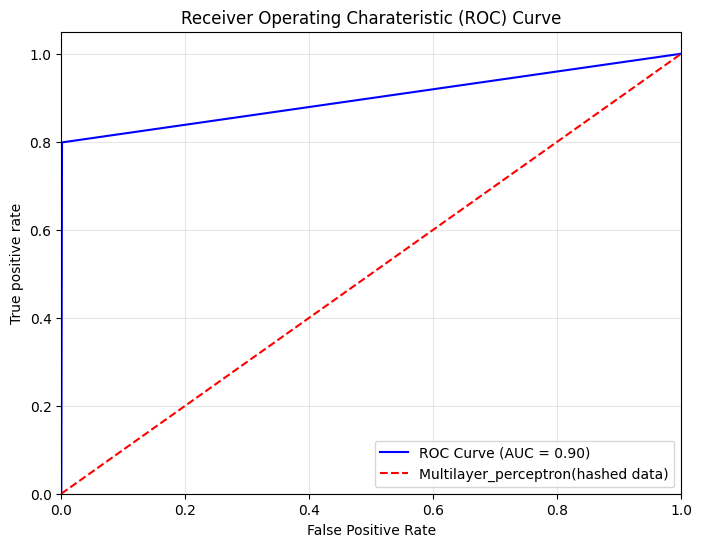

In [10]:
#Multilayer perceptron algorithm 
mlp = MLPClassifier(random_state = 1, max_iter = 1000)
mlp.fit(X = x_train, y = y_train)
pred_test = mlp.predict(X = x_test)

#Calculating ROC curve
fpr, tpr, threshold = roc_curve(y_true = y_test, y_score = pred_test)
#Calculating AUC score 
auc = roc_auc_score(y_true = y_test, y_score = pred_test)
#Plotting roc curve 
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'blue', label = f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--', label = 'Multilayer_perceptron(hashed data)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel(xlabel = "False Positive Rate")
plt.ylabel(ylabel = "True positive rate")
plt.title(label = "Receiver Operating Charateristic (ROC) Curve")
plt.legend(loc = 'lower right')
plt.grid(alpha = 0.3)
plt.show()

In [12]:
print(x_train_label.shape)
print(x_test_label.shape)

(183396, 41)
(45849, 41)


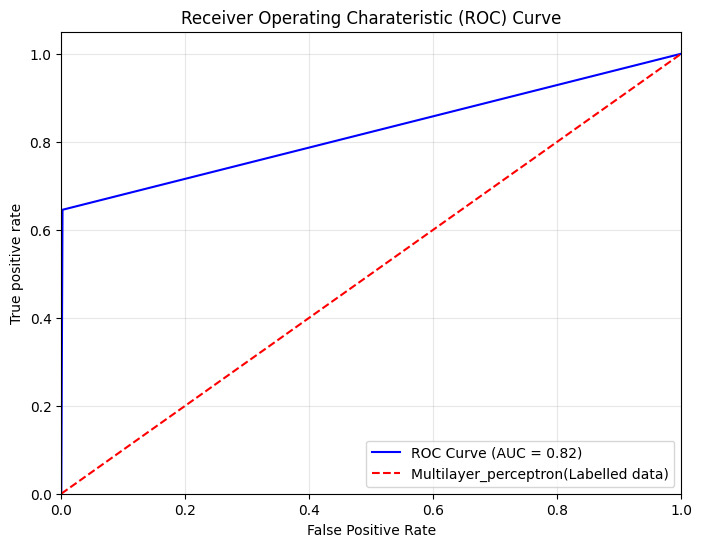

In [13]:
#Multilayer perceptron algorithm 
mlp_label = MLPClassifier(random_state = 1, max_iter = 1000)
mlp_label.fit(X = x_train_label, y = y_train_label)
pred_test_label = mlp_label.predict(X = x_test_label)

#Calculating ROC curve
fpr, tpr, threshold = roc_curve(y_true = y_test_label, y_score = pred_test_label)
#Calculating AUC score 
auc = roc_auc_score(y_true = y_test_label, y_score = pred_test_label)
#Plotting roc curve 
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'blue', label = f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--', label = 'Multilayer_perceptron(Labelled data)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel(xlabel = "False Positive Rate")
plt.ylabel(ylabel = "True positive rate")
plt.title(label = "Receiver Operating Charateristic (ROC) Curve")
plt.legend(loc = 'lower right')
plt.grid(alpha = 0.3)
plt.show()

In [14]:
#Saving the end result in pickle format
pkl.dump(mlp, open('./models/mlp.pkl', 'wb'))

So I have tested the MLP neural network performance for hashed data and labelled data. I think, it would be better if I select the MLP model with hashed dataset to make a server and deploy.

Chatgpt's suggestion for using label encoder and label encoder(with specific use cases).

The choice between using a Label Encoder and a Hash Encoder for encoding categorical variables depends on various factors including the nature of your data, the type of machine learning model you're using, and your specific requirements. Here's a comparison of both methods to help you decide:

### Label Encoding

**Pros:**
- **Simplicity**: Label Encoding assigns a unique integer to each category, making it simple and easy to implement.
- **Efficiency**: It is computationally efficient and works well when there are a limited number of categories.
- **Order Preservation**: For ordinal categorical variables, where the categories have a meaningful order, Label Encoding preserves this order.

**Cons:**
- **Risk of Misinterpretation**: For nominal categorical variables (where there is no inherent order), the model may incorrectly interpret the numerical values as having some sort of ordinal relationship, which can lead to poorer performance.
- **Scalability**: If you have a large number of unique categories, Label Encoding might not be efficient or practical.

### Hash Encoding

**Pros:**
- **Handling High Cardinality**: Hash Encoding is particularly useful for categorical variables with a large number of unique categories, as it maps categories to a fixed number of buckets.
- **Memory Efficiency**: By using a fixed number of buckets, Hash Encoding can be more memory-efficient than one-hot encoding, especially with high-cardinality features.
- **Avoids Ordinality Issues**: Since it uses a hashing function to assign categories to buckets, it doesn't introduce any ordinal relationships between categories.

**Cons:**
- **Collision Risk**: There's a risk of hash collisions, where different categories might be mapped to the same bucket. While this is usually manageable, it can introduce noise.
- **Interpretability**: The encoded features might be less interpretable compared to one-hot or label encoding, as the hash function's output isn't directly related to the original categories.
- **Hyperparameter Tuning**: You need to choose the number of hash buckets, which might require some experimentation and tuning.

### Recommendations

1. **Model Type**:
   - For tree-based models (e.g., Decision Trees, Random Forests, Gradient Boosting), both Label Encoding and Hash Encoding can work well. Tree-based models can handle the ordinal relationship induced by Label Encoding.
   - For linear models or neural networks, where feature scaling and relationships are more critical, Hash Encoding might be preferable to avoid misleading the model with artificial ordinal relationships.

2. **Cardinality of Categorical Variables**:
   - For categorical variables with low to moderate cardinality, Label Encoding is usually sufficient and straightforward.
   - For high-cardinality categorical variables, Hash Encoding is typically more efficient and practical.

3. **Experimentation**:
   - It's often beneficial to experiment with both encodings and evaluate their performance on your specific dataset and model. Use cross-validation to compare the impact of each encoding method on model performance.

### Conclusion

In summary, if you have high-cardinality categorical variables, Hash Encoding is likely to be more effective and efficient. For lower cardinality and simplicity, Label Encoding could be the better choice. Always validate your approach with experiments to ensure it suits your specific use case and improves your machine learning model's performance.